In [198]:
# import desired packages
import tensorflow as tf
import numpy as np
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [199]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [200]:
# get the train data and test data
train_data=mnist.train.images # Return np.array
train_labels=mnist.train.labels
test_data=mnist.test.images # Return np.array
test_labels=mnist.test.labels

In [201]:
# check the dimension of the data
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [202]:
# display some digits
def display(i):
    img=test_data[i]
    plt.title("Example %d, Label: %d" % (i, np.where(test_labels[i] == 1)[0]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

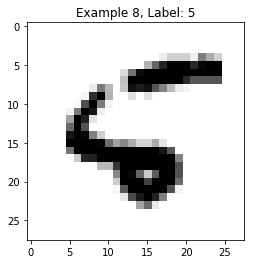

In [203]:
display(8)

In [204]:
# Define the important parameters and variables to work with the tensors
learning_rate=0.01
training_epochs=2000
cost_history=np.empty(shape=[1],dtype=float)

In [205]:
# placeholders and variables, input has 784 features and output has 10 classes
x=tf.placeholder(tf.float32, shape=[None,784])
y_=tf.placeholder(tf.float32, shape=[None,10])
# weight and bias
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [206]:
# model
y=tf.matmul(x,w)+b

In [207]:
# loss function
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [208]:
# optimiser
training_step=tf.train.GradientDescentOptimizer(0.01).minimize(cost_function)

In [209]:
# session parameters
sess=tf.InteractiveSession()
#initialising variables
init=tf.global_variables_initializer()
sess.run(init)

In [210]:
# Train
for _ in range(2000):
    batch_xs, batch_ys = mnist.train.next_batch(400)
    sess.run(training_step, feed_dict={x: batch_xs, y_: batch_ys})

In [211]:
# get the weights
sess.run(w)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [212]:
# get the bias
sess.run(b)

array([-0.06578695,  0.14138913, -0.03303928, -0.04619266,  0.04128652,
        0.11099701, -0.01568985,  0.08063453, -0.18723425, -0.02636394],
      dtype=float32)

In [213]:
# Print the final prediction accuracy
correct_prediction=tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy0=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy=sess.run(accuracy0, feed_dict={x: test_data, y_: test_labels})
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.885


In [214]:
# Check whether we can separate digits 3 and 8
location=sess.run(tf.argmax(test_labels,1))
np_array=np.array(location)    
index8=np.where(np_array==8)
index3=np.where(np_array==3)
# get the data for digits 8 and digits 3
test_data8=test_data[index8]
test_data3=test_data[index3]
test_labels8=test_labels[index8]
test_labels3=test_labels[index3]

In [215]:
f8=sess.run(tf.argmax(y,1), feed_dict={x: test_data8})
print(collections.Counter(f8))
f3=sess.run(tf.argmax(y,1), feed_dict={x: test_data3})
print(collections.Counter(f3))

Counter({8: 821, 3: 37, 5: 29, 9: 15, 6: 15, 7: 14, 2: 13, 4: 11, 1: 10, 0: 9})
Counter({3: 885, 5: 36, 8: 24, 2: 19, 7: 17, 9: 14, 6: 7, 0: 6, 1: 1, 4: 1})


In [216]:
# From the outcome, we can see that for each case, the mistakes are not so big.
# Hence, our method could separate digits 3 and 8